In [1]:

# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pickle


In [2]:

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:

# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('credit-card-default.csv')
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Let's understand the type of columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 ID          30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
defaulted    30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [5]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [6]:

df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [7]:
df['EDUCATION'].replace([0, 6], 5, inplace=True)

In [8]:

df.EDUCATION.value_counts()


2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64

In [9]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [10]:
df['MARRIAGE'].replace(0, 3, inplace=True)

In [11]:
df.MARRIAGE.value_counts()


2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [12]:
df.PAY_2.value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [13]:
df.PAY_0.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [14]:
# Dropping id column as it's no use
df.drop('ID',axis=1, inplace=True)

KeyError: "['ID'] not found in axis"

In [ ]:
# Putting feature variable to X
X = df.drop('defaulted',axis=1)

In [ ]:

# Putting response variable to y
y = df['defaulted']


In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


In [ ]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()
# fit
rfc.fit(X_train,y_train)


In [ ]:

# Making predictions
predictions = rfc.predict(X_test)


In [ ]:

# Let's check the report of our default model
print(classification_report(y_test,predictions))

In [63]:

# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[6673  385]
 [1251  691]]


In [64]:

print(accuracy_score(y_test,predictions))

0.8182222222222222


In [65]:
# ### Hyperparameter Tuning

# The following hyperparameters are present in a random forest classifier. We will tune each parameters
# 
# 
# - **n_estimators** 
# - **criterion**
# - **max_features** 
# - **max_depth**
# - **min_samples_split**
# - **min_samples_leaf**
# - **min_weight_fraction_leaf**
# - **max_leaf_nodes**
# - **min_impurity_split**
# ### Tuning max_depth

In [76]:
# specify number of folds for k-fold CV
n_folds = 5


In [77]:

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

In [78]:
# instantiate the model
rf = RandomForestClassifier()

In [79]:

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [80]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.964500,0.128876,0.038498,0.002314,2,{'max_depth': 2},0.803810,0.803810,0.800000,0.795714,...,0.800524,0.003051,4,0.800179,0.798988,0.800000,0.801190,0.801964,0.800464,0.001025
1,2.316353,0.046228,0.061242,0.013634,7,{'max_depth': 7},0.817143,0.820952,0.819524,0.815476,...,0.818524,0.001954,1,0.832917,0.831429,0.831905,0.831429,0.830655,0.831667,0.000742
2,3.586451,0.341927,0.088564,0.005063,12,{'max_depth': 12},0.814524,0.817619,0.821667,0.812857,...,0.816762,0.003006,2,0.882679,0.883036,0.881369,0.886667,0.885000,0.883750,0.001865
3,5.277849,1.083925,0.113503,0.018198,17,{'max_depth': 17},0.814048,0.815476,0.819762,0.811667,...,0.815238,0.002634,3,0.927798,0.930119,0.930357,0.930893,0.927738,0.929381,0.001341


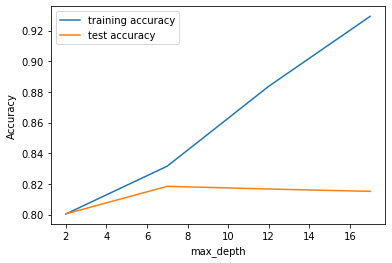

In [81]:

# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [66]:
# specify number of folds for k-fold CV
n_folds = 5

In [67]:

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

In [68]:
# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


In [69]:
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [70]:

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.152883,0.017015,0.035713,0.000748,100,{'n_estimators': 100},0.808810,0.814048,0.810238,0.805714,...,0.809762,0.002681,4,0.81000,0.810179,0.810952,0.812202,0.813690,0.811405,0.001381
1,5.838320,0.113761,0.186246,0.020282,500,{'n_estimators': 500},0.810952,0.814762,0.811429,0.805714,...,0.810190,0.003080,1,0.81131,0.810417,0.811726,0.812619,0.812560,0.811726,0.000822
2,10.703879,0.170945,0.325780,0.023572,900,{'n_estimators': 900},0.811190,0.814524,0.811190,0.805714,...,0.810143,0.003006,2,0.81119,0.810060,0.812262,0.812560,0.812679,0.811750,0.000995
3,15.288403,0.144073,0.440008,0.011321,1300,{'n_estimators': 1300},0.811667,0.813810,0.810952,0.805714,...,0.810048,0.002835,3,0.81131,0.810000,0.811964,0.813095,0.812679,0.811810,0.001091


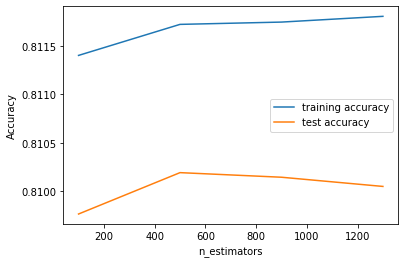

In [71]:

# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5


In [ ]:

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

In [ ]:
# instantiate the model
rf = RandomForestClassifier(max_depth=4)

In [ ]:

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)



In [ ]:

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:

# specify number of folds for k-fold CV
n_folds = 5


In [ ]:

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

In [ ]:
# instantiate the model
rf = RandomForestClassifier()


In [ ]:

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)


In [ ]:

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()


In [ ]:

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:

# GridSearchCV to find optimal min_samples_split
# specify number of folds for k-fold CV
n_folds = 5

In [ ]:
# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

In [ ]:

# instantiate the model
rf = RandomForestClassifier()


In [ ]:

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)


In [ ]:

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()


In [ ]:

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}

In [ ]:

# Create a based model
rf = RandomForestClassifier()


In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)


In [ ]:

# Fit the grid search to the data
grid_search.fit(X_train, y_train)


In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)


In [ ]:

type(grid_search.best_params_)


In [ ]:
# model with the best hyperparameters

rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300)


In [ ]:

# fit
rfc.fit(X_train,y_train)


In [ ]:

# predict
predictions = rfc.predict(X_test)


In [ ]:

# Let's check the report of our default model
print(classification_report(y_test,predictions))


In [ ]:

# Printing confusion matrix
print(confusion_matrix(y_test,predictions))
# Let's check the report of our default model

In [ ]:

print(accuracy_score(y_test,predictions))

In [ ]:

# Saving the model to disk
pickle.dump(rfc, open('model.pkl', 'wb'))
